This Notebook is created to analyse given Plume data.
-

prop_20160611_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20160611_micro_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20150606_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20150609_c_mask_100c_mark_200_cf2_mf1.pkl


prop_20150627_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20160518_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20160530_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20160619_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20160625_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20160719_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20160818_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20160819_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20160830_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20170509_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20170605_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20170627_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20170704_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20170716_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20170719_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20170721_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20180522_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20180606_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20180705_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20180709_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20180710_c_mask_100c_mark_200_cf2_mf1.pkl

In [80]:
import numpy as np
from importlib import reload
import pandas as pd
import slopes_and_binning
from slopes_and_binning import *
reload(slopes_and_binning)
import cloud_and_plumes_slopes
from cloud_and_plumes_slopes import *
reload(cloud_and_plumes_slopes)
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import scipy.ndimage as ndi
from random import random
import matplotlib
import sys

In [116]:
plumes_data = './data/prop_20150609_c_mask_100c_mark_200_cf2_mf1.pkl'
prop_plumes = pd.read_pickle(plumes_data)
prop_plumes.columns

Index(['Volume', 'sq Area', 'Radius', 'Area', 'height', 'V_h', 'w',
       'w profile', 'ql profile', 'qv profile', 'Area profile', 'couv profile',
       'wet h', 'wet A', 'wet V', 'wet w', 'dry h', 'dry A', 'dry V', 'dry w',
       'time', 'x', 'y', 'z', 'base', 'z max cf', 'w flux', 'qt flux',
       'qt total flux', 'qt fluc'],
      dtype='object')

----------------------------------------------------
Let's have a look at the variation of alpha over time
-
plot_plumes_slope() uses log binning

plot_plume_alpha() uses all 3 methods for slope calculation
-

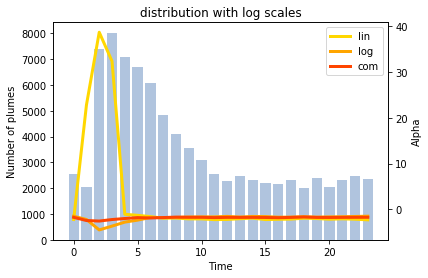

In [119]:
import numpy as np
from importlib import reload
import pandas as pd
import slopes_and_binning
from slopes_and_binning import *
reload(slopes_and_binning)
import cloud_and_plumes_slopes
from cloud_and_plumes_slopes import *
reload(cloud_and_plumes_slopes)
import matplotlib.pyplot as plt

bin_n     = 150
bin_min   = 10
bin_max   = 750
min_pixel = 4

plumes_time_area = prop_plumes[['time','sq Area']]
#del(prop_plumes)
plumes_time_area = plumes_time_area.loc[plumes_time_area['sq Area']<25600]

time, n_plumes, slope_lin, slope_log, slope_com = plot_plume_alpha(plumes_time_area,bin_n,bin_min,bin_max,min_pixel,n_plume_min=500)

axes = plt

axes.bar(time, n_plumes, color='lightsteelblue')
axes.xlabel('Time')
axes.ylabel('Number of plumes')
axes.title('distribution with log scales')

axes2 = axes.twinx()

axes2.set_ylabel('Alpha')
axes2.plot(time, slope_lin, linewidth=3, color='gold', label='lin')
axes2.plot(time, slope_log, linewidth=3, color='orange', label='log')
axes2.plot(time, slope_com, linewidth=3, color='orangered', label='com')

plt.legend()